# Group 41
Jose Eduardo De Moraes Lopez

Camila Navarro Llaven

In [ ]:
# Check the gpu
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
# Change the directory to the one that contains the data

import os as os
from google.colab import drive
drive.mount("/content/drive")

path = '/content/drive/My Drive/WebScience/Final_Project/'
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Youtube

In [ ]:
!pip install google-api-python-client

## New youtube API

In [ ]:
import argparse
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
import pandas as pd

#Developer key API
DEVELOPER_KEY = 'x'
YOUTUBE_API_SERVICE_NAME = 'youtube'
YOUTUBE_API_VERSION = 'v3'
# Build the youtube service
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=DEVELOPER_KEY)

def get_playlist_videos(playlist_id, youtube, max_results=50):
    # This will store all the videos' stats
    all_videos = []

    # Start fetching videos from the playlist
    next_page_token = None
    while True:
        # Fetch the playlist items
        playlist_request = youtube.playlistItems().list(
            playlistId=playlist_id,
            part='snippet',
            maxResults=max_results,
            pageToken=next_page_token
        )
        playlist_response = playlist_request.execute()

        # Fetch video details from the items
        for item in playlist_response['items']:
            video_id = item['snippet']['resourceId']['videoId']
            video_title = item['snippet']['title']

            # Fetch the video statistics
            video_request = youtube.videos().list(
                part='statistics',
                id=video_id
            )
            video_response = video_request.execute()

            # Extract the video statistics
            for video in video_response['items']:
                view_count = video['statistics']['viewCount']
                like_count = video['statistics'].get('likeCount', 0)  # Some videos might not have likes/dislikes
                dislike_count = video['statistics'].get('dislikeCount', 0)

                # Append the video statistics to the all_videos list
                all_videos.append({
                    'video_id': video_id,
                    'title': video_title,
                    'view_count': view_count,
                    'like_count': like_count,
                    'dislike_count': dislike_count
                })

        # Check if there is a next page
        next_page_token = playlist_response.get('nextPageToken')
        if not next_page_token:
            break

    return all_videos

playlist_id = 'PLirAqAtl_h2pRAtj2DgTa3uWIZ3-0LKTA'
videos = get_playlist_videos(playlist_id, youtube)

# Convert the list of videos to a DataFrame
videos_df = pd.DataFrame(videos)

# Save the DataFrame to a json file
videos_df.to_json('most_viewed_vevo_videos.json', orient='records', lines=True)

videos_df


,video_id,title,view_count,like_count,dislike_count
0,kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,8365125052,52761257,0
1,OPf0YbXqDm0,Mark Ronson - Uptown Funk (Official Video) ft....,5137813481,21217322,0
2,k85mRPqvMbE,Crazy Frog - Axel F (Official Video),4300030626,17538636,0
3,09R8_2nJtjg,Maroon 5 - Sugar (Official Music Video),3996102662,15981234,0
4,hT_nvWreIhg,OneRepublic - Counting Stars,3959180726,17627010,0
...,...,...,...,...,...
772,o9tJW9MDs2M,Justin Bieber - Pray (Official Music Video),135255872,1014425,0
773,10IKRNNfCGU,Justin Bieber - Sorry (Latino Remix / Audio) f...,134039741,1255502,0
774,pqky5B179nM,"will.i.am, Nicki Minaj - Check It Out (Officia...",131169198,589183,0
775,T6j4f8cHBIM,Nicki Minaj - Stupid Hoe (Explicit)(Official V...,130652475,1092555,0


In [ ]:
import json

folder_path = '/content/drive/MyDrive/WebScience/Final_Project/most_viewed_vevo_videos.json'

# Initialize a list to store the data
data = []

# Open the file and read it line by line
with open(folder_path, 'r') as file:
    for line in file:
        try:
            # Parse each line as JSON and append it to the list
            item = json.loads(line)
            data.append(item)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {str(e)}")



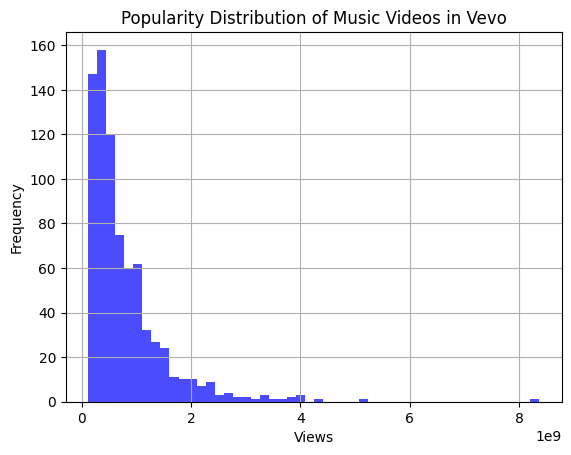

In [ ]:
import matplotlib.pyplot as plt

# Extract view counts from the loaded data
view_counts = [int(video['view_count']) for video in data]

# Create a histogram
plt.hist(view_counts, bins=50, color='blue', alpha=0.7)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Popularity Distribution of Music Videos in Vevo')
plt.grid(True)
plt.show()


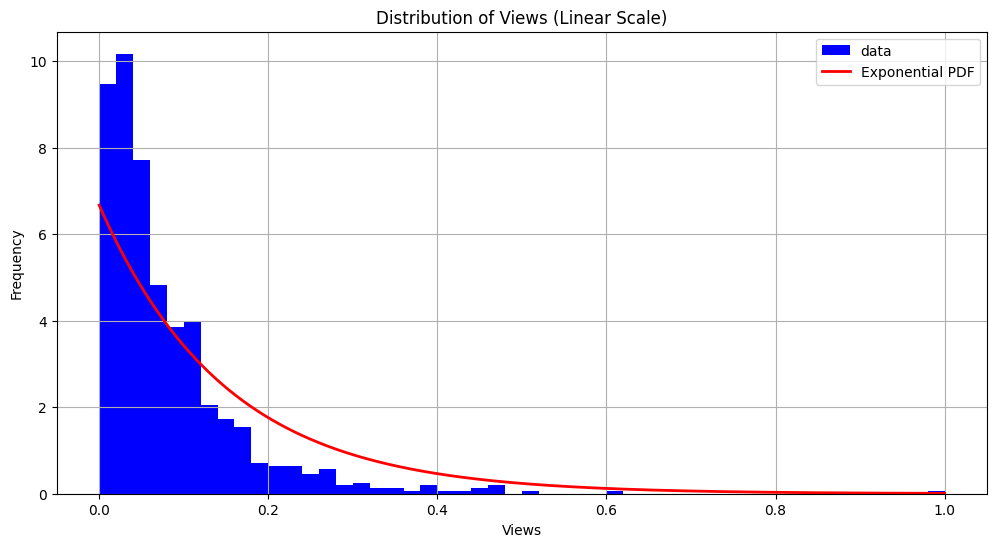

In [ ]:
import plotly.express as px
import numpy as np
from scipy.stats import expon

# Convert view_counts to a NumPy array
view_counts = np.array(view_counts)

# Normalize view counts
norm_view_counts = (view_counts - np.min(view_counts)) / (np.max(view_counts) - np.min(view_counts))

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting in linear scale
ax.hist(norm_view_counts, bins=50, color='blue', label='data', density=True)

x = np.linspace(np.min(norm_view_counts), np.max(norm_view_counts), len(norm_view_counts))
exp_pdf = expon.pdf(x, scale=.15)

# Adding exponential distribution line to the histogram
ax.plot(x, exp_pdf, 'red', lw=2, label='Exponential PDF')

# Add a legend and show the plot
ax.grid(True)
ax.legend()

# Set titles and labels
ax.set_title('Distribution of Views (Linear Scale)')
ax.set_xlabel('Views')
ax.set_ylabel('Frequency')
ax.grid(True)
ax.legend()

plt.show()


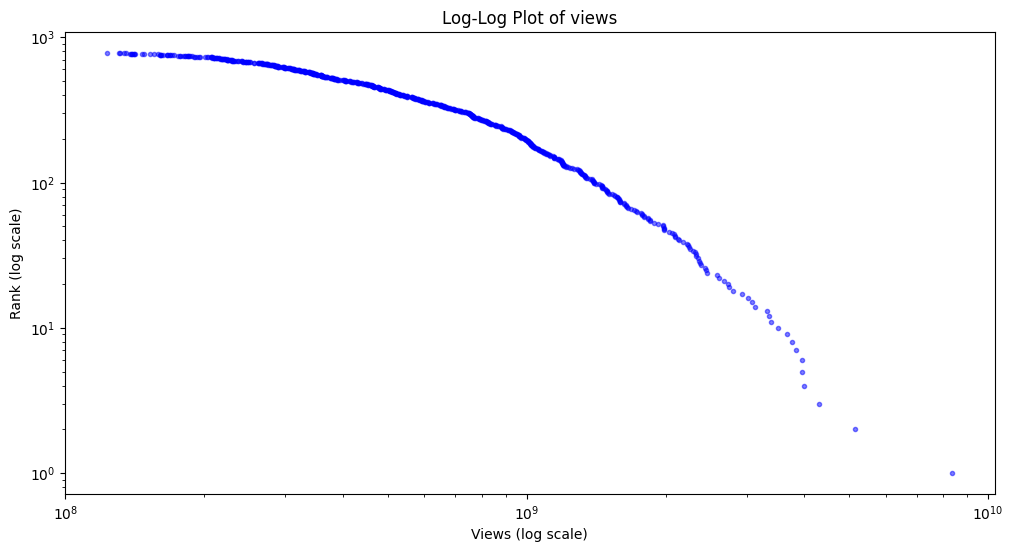

In [ ]:
# Plotting log-log plot
fig, ax = plt.subplots(figsize=(12, 6))

# Sort view counts in descending order
view_counts_sorted = sorted(view_counts, reverse=True)

# Generate ranks
ranks = range(1, len(view_counts_sorted) + 1)

ax.scatter(view_counts_sorted, ranks, alpha=0.5, marker='.', color='blue')

ax.set_title('Log-Log Plot of views')
ax.set_xlabel('Views (log scale)')
ax.set_ylabel('Rank (log scale)')
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()


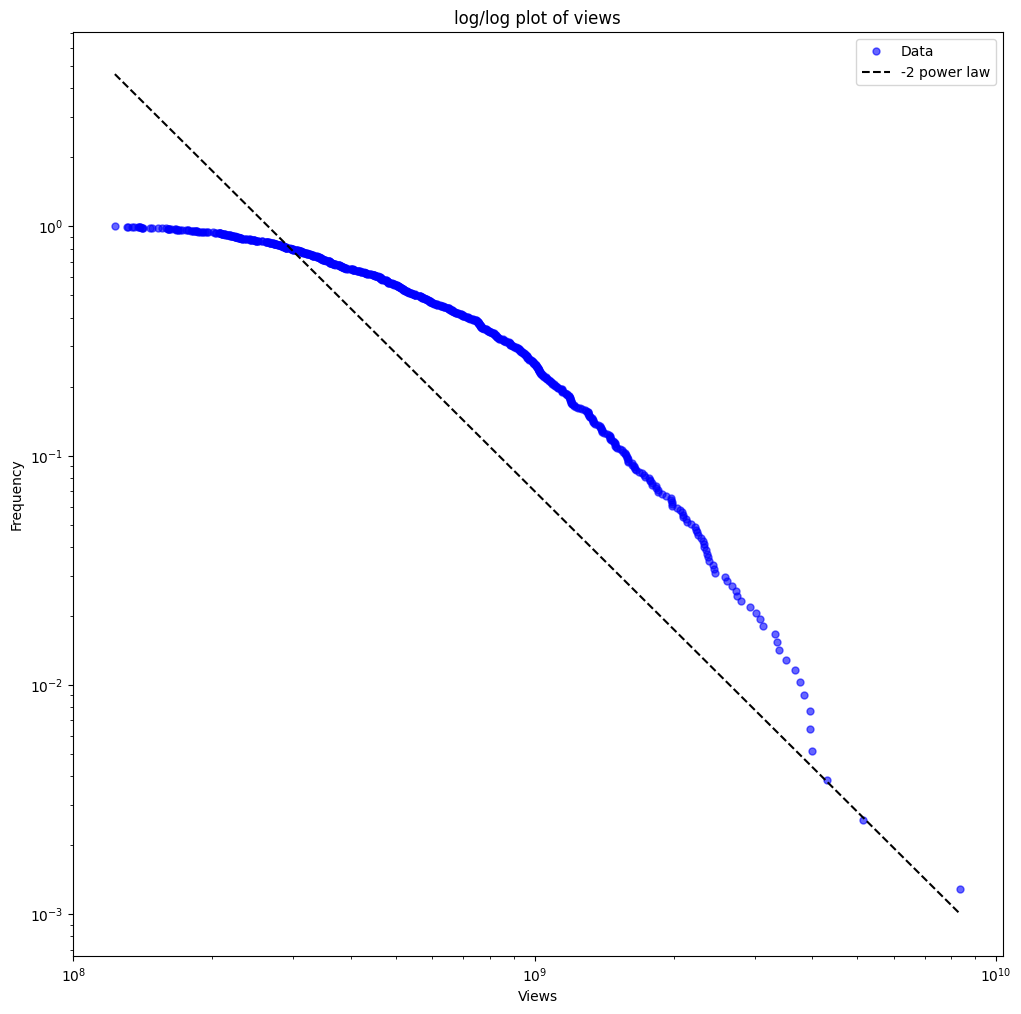

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

x_data = np.sort(view_counts)
y_data = np.arange(1, len(view_counts)+1) / len(view_counts)

# Scatter plot on log-log scale
ax.loglog(x_data, y_data[::-1], color = 'blue', alpha=0.6, linestyle='', marker='o', markersize=5, label='Data')

# To add a power-law reference line with a slope of -3, we create a line in log-space
# that we know will have that slope when plotted on a log-log scale.
x_ref = np.array([min(view_counts), max(view_counts)])
y_ref = (x_ref / max(view_counts)) ** -2  # slope of -3 on a log-log scale

# Adjust the y_ref to lower the line
adjustment_factor = 0.001  # Lower this factor to lower the line further
y_ref = y_ref * adjustment_factor

# Plot the reference line
ax.loglog(x_ref, y_ref, 'k--', label='-2 power law')

# Label axes
ax.set_xlabel('Views')
ax.set_ylabel('Frequency')
ax.set_title('log/log plot of views')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
!pip install powerlaw

In [ ]:
view_counts

array([8365125052, 5137813481, 4300030626, 3996102662, 3959180726,
       3946977319, 3839580940, 3762619285, 3664533070, 3497027060,
       3393016873, 3352340122, 3316299592, 3120731175, 3086437438,
       3012200423, 2922300631, 2802361196, 2741246111, 2731326064,
       2671181909, 2607411823, 2582080175, 2454110421, 2429570990,
       2442178099, 2382524563, 2374366386, 2361378849, 2347159642,
       2330453098, 2321785427, 2323147360, 2288724748, 2247897520,
       2257618804, 2241514450, 2228660663, 2186524800, 2143946490,
       2128734564, 2094273315, 2093277837, 2087707283, 2068843661,
       2038164442, 1984241159, 1982957565, 1981198329, 1971203892,
       1976782029, 1929910063, 1883686757, 1852961846, 1850370812,
       1834078185, 1831505578, 1799528657, 1794708981, 1774597460,
       1779439663, 1768070701, 1736846987, 1725930597, 1709713244,
       1686752759, 1654444920, 1651182939, 1644571492, 1639262299,
       1628263881, 1622029015, 1593937909, 1594287765, 1591593

In [ ]:
import powerlaw

# Fit the power-law model
results = powerlaw.Fit(view_counts)
R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)

print(f"Likelihood Ratio: {R}")
print(f"p-value: {p}")


Calculating best minimal value for power law fit
Likelihood Ratio: 0.143105124883005
p-value: 0.8862071575324483


In [ ]:
import scipy.stats as stats

# Fit the power-law and exponential models
power_law_params = stats.powerlaw.fit(view_counts)
expon_params = stats.expon.fit(view_counts)

# Calculate the log-likelihoods
power_law_loglik = np.sum(stats.powerlaw.logpdf(view_counts, *power_law_params))
expon_loglik = np.sum(stats.expon.logpdf(view_counts, *expon_params))

# Calculate the number of parameters (k) - for both models this is 2
# We have scale and location parameters for both distributions.
k = 2

# Calculate the AICs
power_law_aic = 2 * k - 2 * power_law_loglik
expon_aic = 2 * k - 2 * expon_loglik

# Compare the AIC values
print(f"Power-law AIC: {power_law_aic}")
print(f"Exponential AIC: {expon_aic}")

Power-law AIC: 34023.42267426284
Exponential AIC: 33126.61769434289


In [ ]:
power_law_params

(0.32689194385200326, 123118840.99999999, 8242006211.000001)

## Reggaeton Youtube API (Stage 1)

In [ ]:
import argparse

from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

DEVELOPER_KEY = 'x'
YOUTUBE_API_SERVICE_NAME = 'youtube'
YOUTUBE_API_VERSION = 'v3'

youtube = build('youtube', 'v3', developerKey=DEVELOPER_KEY)

# Define query parameters
query_params = {
    'type': 'video',
    'videoCategoryId': '10',
    'videoDuration': 'short',
    'maxResults': 50,  # Max results per request
    'part': 'snippet',
    'q':'reggaeton'
}

In [ ]:
# Function to get videos and append to the list
def get_videos(search_params, stats_list, page_token=None):
    if page_token:
        search_params['pageToken'] = page_token

    # Make the search API request
    search_request = youtube.search().list(**query_params)
    search_response = search_request.execute()

    # Extract video information from search results
    videos = search_response.get('items', [])

    # Iterate through videos
    for video in videos:
        title = video['snippet']['title']
        video_id = video['id']['videoId']

        # Now make a request to get statistics for each video
        stats_request = youtube.videos().list(
            part='statistics',
            id=video_id
        )
        stats_response = stats_request.execute()

        # Extract statistics
        stats = stats_response.get('items', [])[0]['statistics']
        view_count = int(stats.get('viewCount', 0))
        like_count = int(stats.get('likeCount', 0))
        dislike_count = int(stats.get('dislikeCount', 0))

        # Append statistics to the list
        stats_list.append({'Title': title, 'ViewCount': view_count, 'LikeCount': like_count, 'DislikeCount': dislike_count})

    return search_response.get('nextPageToken')

# Create a list to store statistics
stats_list = []
next_page_token = None
# Perform the loop for a total of 4 iterations or until 200 videos are collected
for _ in range(20):
    next_page_token = get_videos(query_params, stats_list, next_page_token)

    # Break the loop if the total number of videos reaches 200
    if len(stats_list) >= 1000:
        break

# Create a DataFrame from the list of statistics
df = pd.DataFrame(stats_list)

# Save the DataFrame to a JSON file
df.to_json('reggaeton_videos_stats.json', orient='records', lines=True)

df

,Title,ViewCount,LikeCount,DislikeCount
0,Darell - Lollipop (Official Video),142706864,650348,0
1,REGGAETON CHAMPAGNE - Bellakath ft Dani Flow (...,125387792,1040317,0
2,"KAROL G, Shakira - TQG (Official Video)",958735675,8552648,0
3,"Maluma, J Balvin - Gafas Negras (Official Video)",718451,37564,0
4,Musica 2024 Los Mas Nuevo - Pop Latino 2024 - ...,5304,340,0
...,...,...,...,...
840,(FREE) Type Beat Reggaeton PERREO | DON PERRE...,1411,16,0
841,Esta lista fue muy dificil😓 Que canción me fal...,419,61,0
842,MIX REGGAETON 2024 - LO MÁS NUEVO 2024 - Rauw ...,1881,198,0
843,POTRA | Dani Flow x Bellakath x Yeri Mua | REG...,2348,70,0


In [ ]:
import json

folder_path2 = '/content/drive/MyDrive/WebScience/Final_Project/Data/reggaeton_videos_stats.json'

# Initialize a list to store the data
data = []

# Open the file and read it line by line
with open(folder_path2, 'r') as file:
    for line in file:
        try:
            # Parse each line as JSON and append it to the list
            item = json.loads(line)
            data.append(item)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {str(e)}")




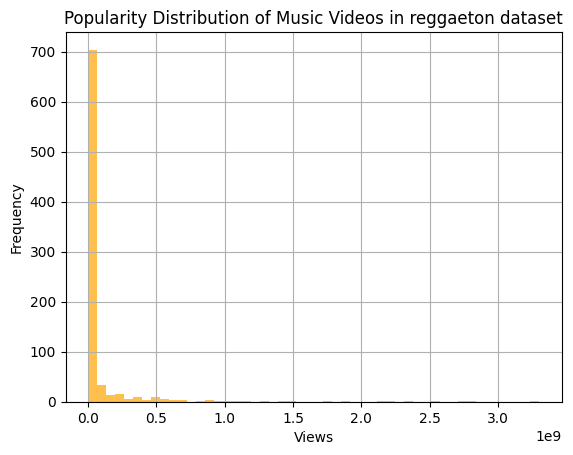

In [ ]:
import matplotlib.pyplot as plt

# Extract view counts from the loaded data
view_counts = [int(video['ViewCount']) for video in data]

# Create a histogram
plt.hist(view_counts, bins=50, color='orange', alpha=0.7)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Popularity Distribution of Music Videos in reggaeton dataset')
plt.grid(True)
plt.show()


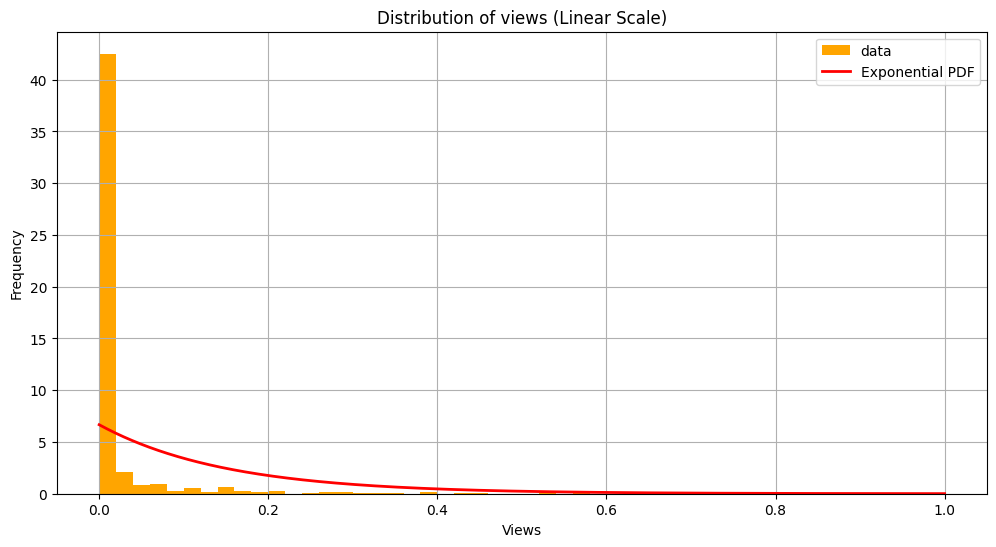

In [ ]:
import plotly.express as px
import numpy as np
from scipy.stats import expon

# Convert view_counts to a NumPy array
view_counts = np.array(view_counts)

# Normalize view counts
norm_view_counts = (view_counts - np.min(view_counts)) / (np.max(view_counts) - np.min(view_counts))

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting in linear scale
ax.hist(norm_view_counts, bins=50, color='orange', label='data', density=True)

x = np.linspace(np.min(norm_view_counts), np.max(norm_view_counts), len(norm_view_counts))
exp_pdf = expon.pdf(x, scale=.15)

# Adding exponential distribution line to the histogram
ax.plot(x, exp_pdf, 'red', lw=2, label='Exponential PDF')

# Add a legend and show the plot
ax.grid(True)
ax.legend()

# Set titles and labels
ax.set_title('Distribution of views (Linear Scale)')
ax.set_xlabel('Views')
ax.set_ylabel('Frequency')
ax.grid(True)
ax.legend()

plt.show()


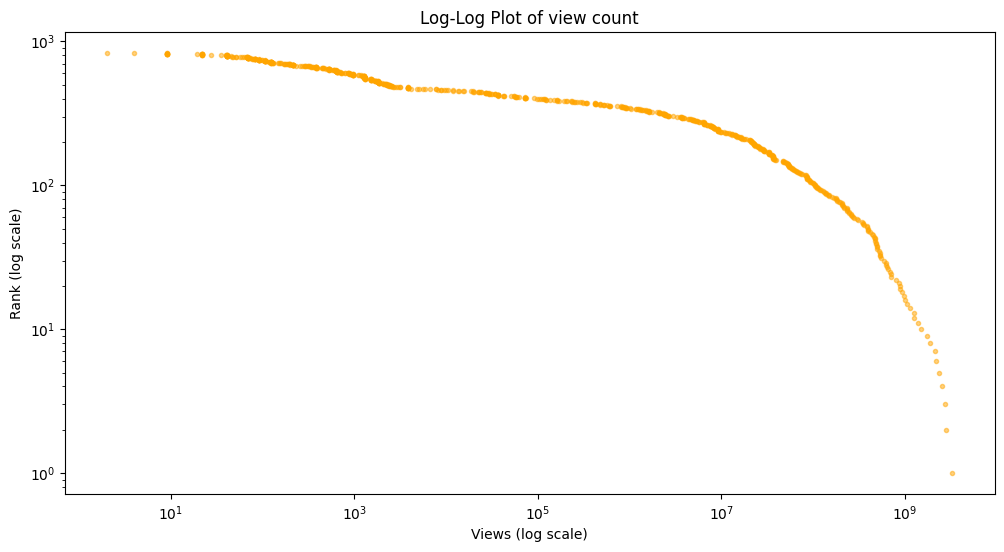

In [ ]:
# Plotting log-log plot
fig, ax = plt.subplots(figsize=(12, 6))

# Sort view counts in descending order
view_counts_sorted = sorted(view_counts, reverse=True)

# Generate ranks
ranks = range(1, len(view_counts_sorted) + 1)

ax.scatter(view_counts_sorted, ranks, alpha=0.5, marker='.', color='orange')

ax.set_title('Log-Log Plot of view count')
ax.set_xlabel('Views (log scale)')
ax.set_ylabel('Rank (log scale)')
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()


<ipython-input-89-b821defb242a>:12: RuntimeWarning: divide by zero encountered in power
  y_ref = (x_ref / max(view_counts)) ** -3  # slope of -3 on a log-log scale


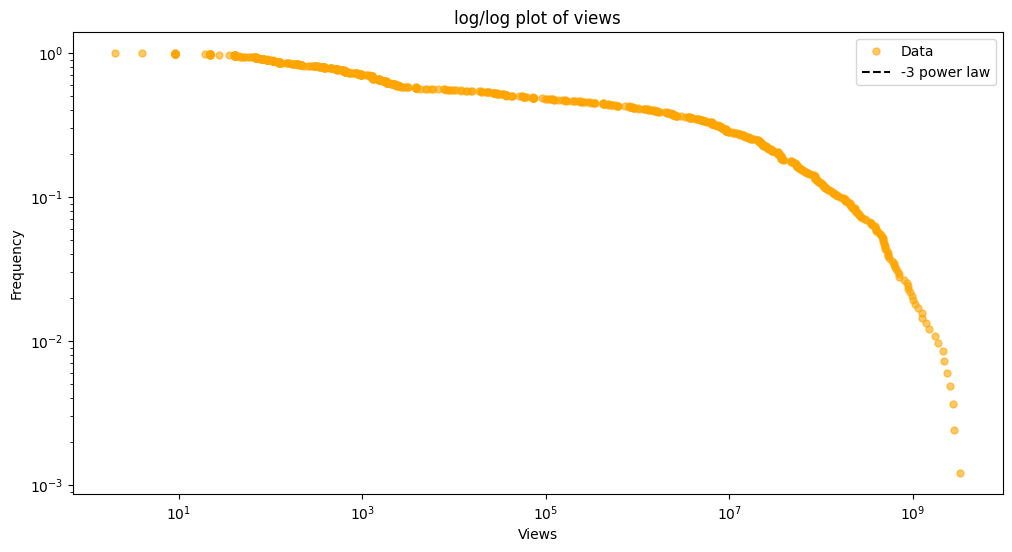

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

x_data = np.sort(view_counts)
y_data = np.arange(1, len(view_counts)+1) / len(view_counts)

# Scatter plot on log-log scale
ax.loglog(x_data, y_data[::-1], color = 'orange', alpha=0.6, linestyle='', marker='o', markersize=5, label='Data')

# To add a power-law reference line with a slope of -3, we create a line in log-space
# that we know will have that slope when plotted on a log-log scale.
x_ref = np.array([min(view_counts), max(view_counts)])
y_ref = (x_ref / max(view_counts)) ** -3  # slope of -3 on a log-log scale

# Adjust the y_ref to lower the line
adjustment_factor = 0.005  # Lower this factor to lower the line further
y_ref = y_ref * adjustment_factor

# Plot the reference line
ax.loglog(x_ref, y_ref, 'k--', label='-3 power law')

# Label axes
ax.set_xlabel('Views')
ax.set_ylabel('Frequency')
ax.set_title('log/log plot of views')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
max(view_counts)

3302177431

In [ ]:
min(view_counts)

0

In [ ]:
import powerlaw

# Fit the power-law model
results = powerlaw.Fit(view_counts)
R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)

print(f"Likelihood Ratio: {R}")
print(f"p-value: {p}")

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Likelihood Ratio: 0.3783333635111361
p-value: 0.7051829636173814


In [ ]:
import scipy.stats as stats

# Fit the power-law and exponential models
power_law_params = stats.powerlaw.fit(view_counts)
expon_params = stats.expon.fit(view_counts)

# Calculate the log-likelihoods
power_law_loglik = np.sum(stats.powerlaw.logpdf(view_counts, *power_law_params))
expon_loglik = np.sum(stats.expon.logpdf(view_counts, *expon_params))

# Calculate the number of parameters (k) - for both models this is 2
# We have scale and location parameters for both distributions.
k = 2

# Calculate the AICs
power_law_aic = 2 * k - 2 * power_law_loglik
expon_aic = 2 * k - 2 * expon_loglik

# Compare the AIC values
print(f"Power-law AIC: {power_law_aic}")
print(f"Exponential AIC: {expon_aic}")

Power-law AIC: 23197.97173732289
Exponential AIC: 31813.62246628849


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:7940: RuntimeWarning: overflow encountered in divide
  return (shape - 1) * np.sum(1 / (loc - data))  # -1/(data-loc)


In [ ]:
power_law_params

(0.08818203454422723, -2.2250738585072014e-308, 3302177431.0000005)

## Youtube top 100 (Provided dataset stage 1)

In [ ]:
## 1. IMPORTING THE DATA

import json
import datetime
import pandas as pd
import numpy as np


def process_json_file(file_path, date = None):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Check if data is a list or a dictionary
    if isinstance(data, list):
        items = data  # If data is a list, use it directly
    elif 'items' in data:
        items = data['items']  # If data is a dictionary with 'items' key
    else:
        raise ValueError("Unexpected JSON format")

    data_list = []
    for song in items:
        # Extracting information
        day = date
        song_title = song['snippet']['title']
        like_count = song['statistics']['likeCount']
        dislike_count = song['statistics']['dislikeCount']
        view_count = song['statistics']['viewCount']

        data_list.append({'Day': day, 'songTitle': song_title, 'likeCount': like_count, 'dislikeCount': dislike_count, 'viewCount': view_count})

    return data_list


In [ ]:
# Folder path
folder_path = '/content/drive/MyDrive/WebScience/Final_Project/Data/youtube_top100'

# List to store individual dataframes
dfs = []

init_date = datetime.datetime.strptime("11/9/15", "%m/%d/%y")
stop_date = datetime.datetime.strptime("1/4/16", "%m/%d/%y")

# Process each JSON file
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        data = process_json_file(file_path, init_date)
        df = pd.DataFrame(data)
        dfs.append(df)
        if init_date == stop_date:
          init_date = init_date + datetime.timedelta(days=77)
        init_date = init_date + datetime.timedelta(days=1)

# Concatenate all dataframes into one
final_yt_df = pd.concat(dfs, ignore_index=True)

# Display the resulting dataframe
final_yt_df.head()

,Day,songTitle,likeCount,dislikeCount,viewCount
0,2015-11-09,Adele - Hello,4093202,101335,297130779
1,2015-11-09,Justin Bieber - Sorry (Dance Video),1355977,71243,92743480
2,2015-11-09,Drake - Hotline Bling,672355,60531,57075104
3,2015-11-09,Justin Bieber - What Do You Mean?,2310400,254413,276365510
4,2015-11-09,Shawn Mendes - Stitches (Official Video),906781,14618,72148555


In [ ]:
df = final_yt_df

In [ ]:
# Convert the 'viewCount' column to numeric
df['viewCount'] = pd.to_numeric(df['viewCount'], errors='coerce')

In [ ]:
# Sort the DataFrame by 'songTitle' and 'Day'
df.sort_values(by=['songTitle', 'Day'], inplace=True)

# Group by 'songTitle' and calculate the daily views using 'diff'
df['daily_views'] = df.groupby('songTitle')['viewCount'].diff()

# Fill NaN values with 0 for the first occurrence
df['daily_views'] = df['daily_views'].fillna(0)


In [ ]:
df.sort_values(by='Day', inplace=True)

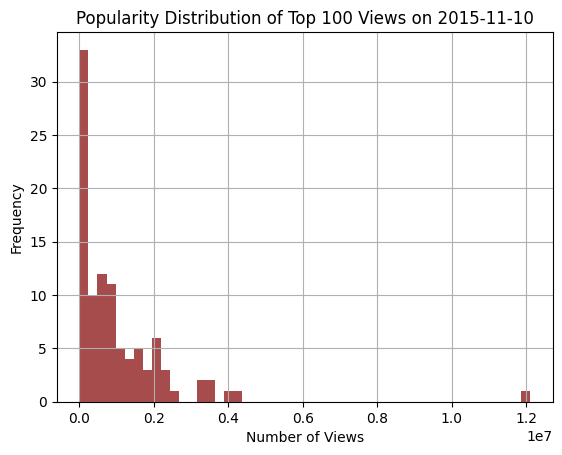

In [ ]:

# Select date
your_date = '2015-11-10'

# Filter the dataset for records on the specific day
filtered_df = df[df['Day'] == your_date]

# Drop rows with NaN values in 'daily_views' (if any)
filtered_df = filtered_df.dropna(subset=['daily_views'])

# Extract the view counts for that day
view_counts = filtered_df['daily_views']

# Set custom x-axis range (1 million to 50 million)

# Plot the distribution of the number of views within the custom x-axis range
plt.hist(view_counts, bins=50, color='maroon', alpha=0.7)
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.title('Popularity Distribution of Top 100 Views on ' + your_date)
plt.grid(True)

# Customize x-axis labels

plt.show()

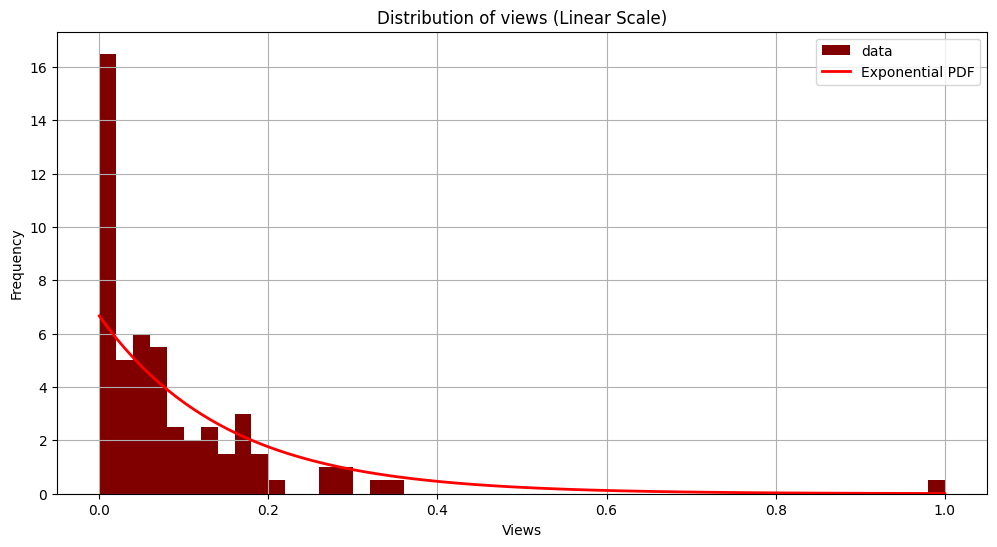

In [ ]:
import plotly.express as px
import numpy as np
from scipy.stats import expon

# Convert view_counts to a NumPy array
view_counts = np.array(view_counts)

# Normalize view counts
norm_view_counts = (view_counts - np.min(view_counts)) / (np.max(view_counts) - np.min(view_counts))

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting in linear scale
ax.hist(norm_view_counts, bins=50, color='maroon', label='data', density=True)

x = np.linspace(np.min(norm_view_counts), np.max(norm_view_counts), len(norm_view_counts))
exp_pdf = expon.pdf(x, scale=.15)

# Adding exponential distribution line to the histogram
ax.plot(x, exp_pdf, 'red', lw=2, label='Exponential PDF')

# Add a legend and show the plot
ax.grid(True)
ax.legend()

# Set titles and labels
ax.set_title('Distribution of views (Linear Scale)')
ax.set_xlabel('Views')
ax.set_ylabel('Frequency')
ax.grid(True)
ax.legend()

plt.show()


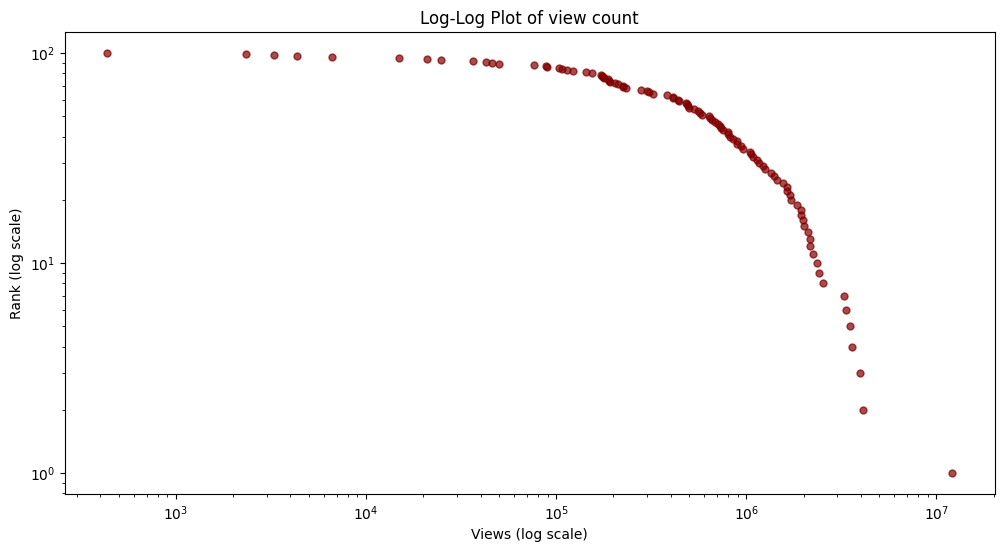

In [ ]:
# Plotting log-log plot
fig, ax = plt.subplots(figsize=(12, 6))

# Sort view counts in descending order
view_counts_sorted = sorted(view_counts, reverse=True)

# Generate ranks
ranks = range(1, len(view_counts_sorted) + 1)

ax.scatter(view_counts_sorted, ranks, s=100, alpha=.7, marker='.', color='maroon')

ax.set_title('Log-Log Plot of view count')
ax.set_xlabel('Views (log scale)')
ax.set_ylabel('Rank (log scale)')
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

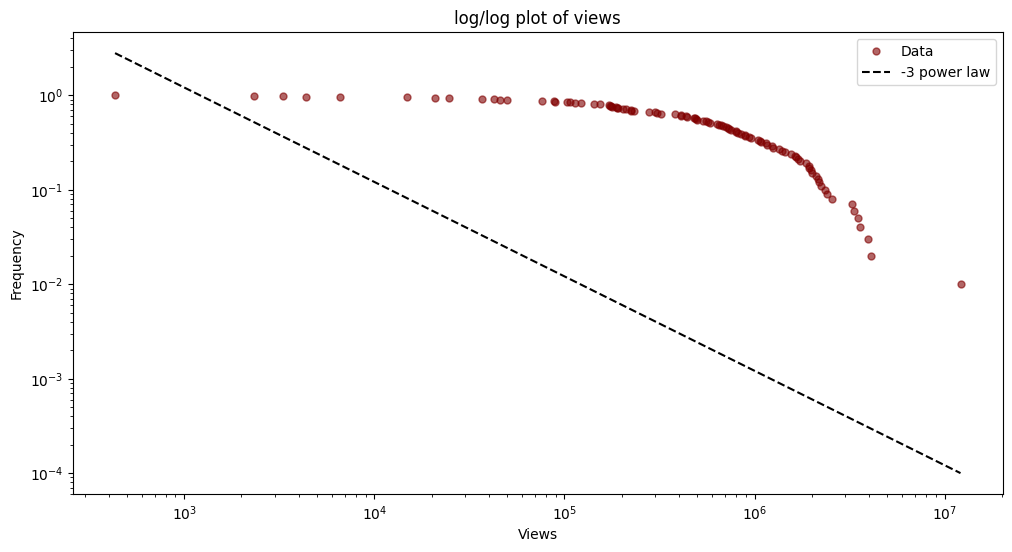

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

x_data = np.sort(view_counts)
y_data = np.arange(1, len(view_counts)+1) / len(view_counts)

# Scatter plot on log-log scale
ax.loglog(x_data, y_data[::-1], color = 'maroon', alpha=0.6, linestyle='', marker='o', markersize=5, label='Data')

# To add a power-law reference line with a slope of -3, we create a line in log-space
# that we know will have that slope when plotted on a log-log scale.
x_ref = np.array([min(view_counts), max(view_counts)])
y_ref = (x_ref / max(view_counts)) ** -1  # slope of -3 on a log-log scale

# Adjust the y_ref to lower the line
adjustment_factor = 0.0001  # Lower this factor to lower the line further
y_ref = y_ref * adjustment_factor

# Plot the reference line
ax.loglog(x_ref, y_ref, 'k--', label='-3 power law')

# Label axes
ax.set_xlabel('Views')
#ax.set_ylim([-100, 100])
ax.set_ylabel('Frequency')
ax.set_title('log/log plot of views')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
import powerlaw

# Fit the power-law model
results = powerlaw.Fit(view_counts)
R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)

print(f"Likelihood Ratio: {R}")
print(f"p-value: {p}")

Calculating best minimal value for power law fit
Likelihood Ratio: 1.0067763791868736
p-value: 0.3140422481449574


In [ ]:
import scipy.stats as stats

# Fit the power-law and exponential models
power_law_params = stats.powerlaw.fit(view_counts)
expon_params = stats.expon.fit(view_counts)

# Calculate the log-likelihoods
power_law_loglik = np.sum(stats.powerlaw.logpdf(view_counts, *power_law_params))
expon_loglik = np.sum(stats.expon.logpdf(view_counts, *expon_params))

# Calculate the number of parameters (k) - for both models this is 2
# We have scale and location parameters for both distributions.
k = 2

# Calculate the AICs
power_law_aic = 2 * k - 2 * power_law_loglik
expon_aic = 2 * k - 2 * expon_loglik

# Compare the AIC values
print(f"Power-law AIC: {power_law_aic}")
print(f"Exponential AIC: {expon_aic}")

Power-law AIC: 2979.8871610491174
Exponential AIC: 2974.2198848647113


In [ ]:
view_counts

array([1.9087100e+05, 1.0487220e+06, 1.0862390e+06, 9.3757800e+05,
       3.2161700e+05, 2.1175300e+05, 1.5630150e+06, 2.3197400e+05,
       3.3279400e+06, 1.1377000e+05, 5.3345000e+05, 4.9148300e+05,
       1.1431080e+06, 4.1006800e+05, 2.3446330e+06, 1.9923980e+06,
       2.9930300e+05, 4.9882000e+04, 6.3775500e+05, 1.7891000e+05,
       1.5448100e+05, 8.2158300e+05, 1.6924440e+06, 1.8712400e+05,
       5.5573100e+05, 8.9301600e+05, 1.2116106e+07, 1.9438810e+06,
       2.4641000e+04, 9.5497900e+05, 1.0748400e+05, 5.7020500e+05,
       1.7181000e+05, 6.6293500e+05, 2.4079460e+06, 7.9978400e+05,
       4.2823000e+04, 7.9774800e+05, 4.5711000e+04, 2.2295350e+06,
       4.1118100e+05, 8.9045000e+04, 3.0682600e+05, 4.8515700e+05,
       7.6440000e+04, 4.3624500e+05, 2.0022660e+06, 7.3582900e+05,
       2.7793100e+05, 3.6007950e+06, 6.8405400e+05, 1.9377800e+06,
       6.5890000e+03, 4.4336200e+05, 2.3230000e+03, 1.6407320e+06,
       1.3899750e+06, 2.1176340e+06, 3.9608970e+06, 5.0117700e

<ipython-input-108-da139c70b637>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['viewCount'] = pd.to_numeric(filtered_df['viewCount'], errors='coerce')


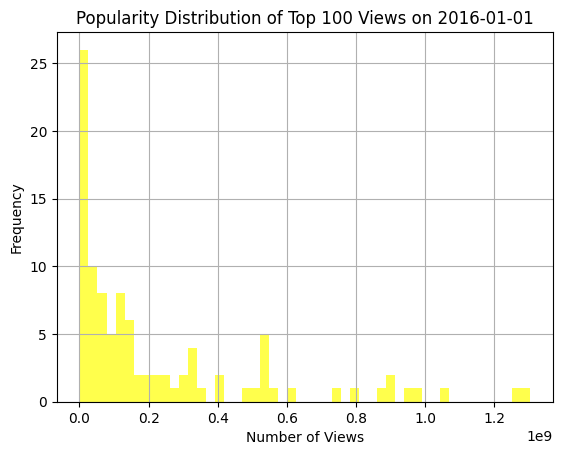

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select date
your_date = '2016-01-01'

# Filter the dataset for records on the specific day
filtered_df = final_yt_df[final_yt_df['Day'] == your_date]

# Convert the 'viewCount' column to numeric
filtered_df['viewCount'] = pd.to_numeric(filtered_df['viewCount'], errors='coerce')

# Drop rows with NaN values in 'viewCount' (if any)
filtered_df = filtered_df.dropna(subset=['viewCount'])

# Extract the view counts for that day
view_counts = filtered_df['viewCount']


# Plot the distribution of the number of views within the x-axis range
plt.hist(view_counts, bins=50, color='yellow', alpha=0.7)
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.title('Popularity Distribution of Top 100 Views on ' + your_date)
plt.grid(True)

plt.show()


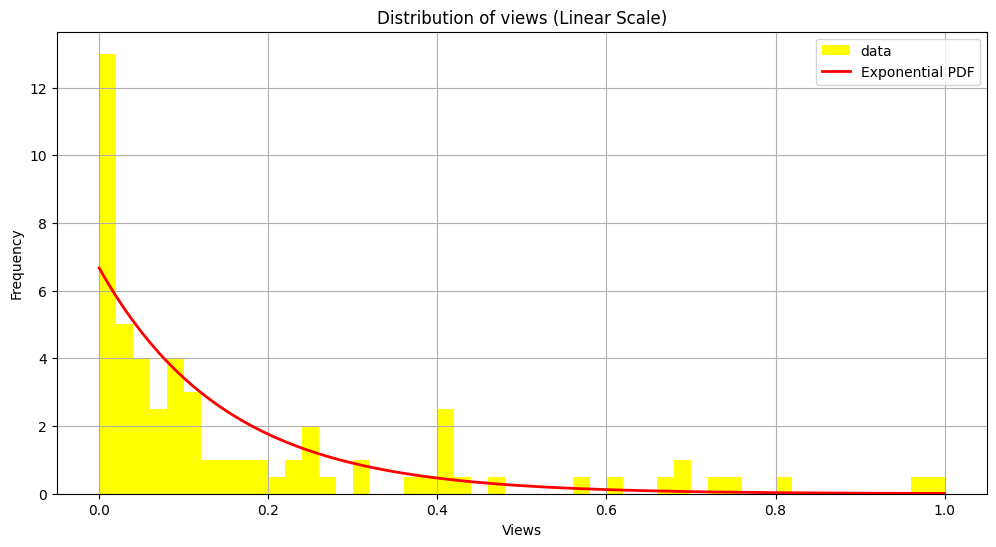

In [ ]:
import plotly.express as px
import numpy as np
from scipy.stats import expon

# Convert view_counts to a NumPy array
view_counts = np.array(view_counts)

# Normalize view counts
norm_view_counts = (view_counts - np.min(view_counts)) / (np.max(view_counts) - np.min(view_counts))

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting in linear scale
ax.hist(norm_view_counts, bins=50, color='yellow', label='data', density=True)

x = np.linspace(np.min(norm_view_counts), np.max(norm_view_counts), len(norm_view_counts))
exp_pdf = expon.pdf(x, scale=.15)

# Adding exponential distribution line to the histogram
ax.plot(x, exp_pdf, 'red', lw=2, label='Exponential PDF')

# Add a legend and show the plot
ax.grid(True)
ax.legend()

# Set titles and labels
ax.set_title('Distribution of views (Linear Scale)')
ax.set_xlabel('Views')
ax.set_ylabel('Frequency')
ax.grid(True)
ax.legend()

plt.show()


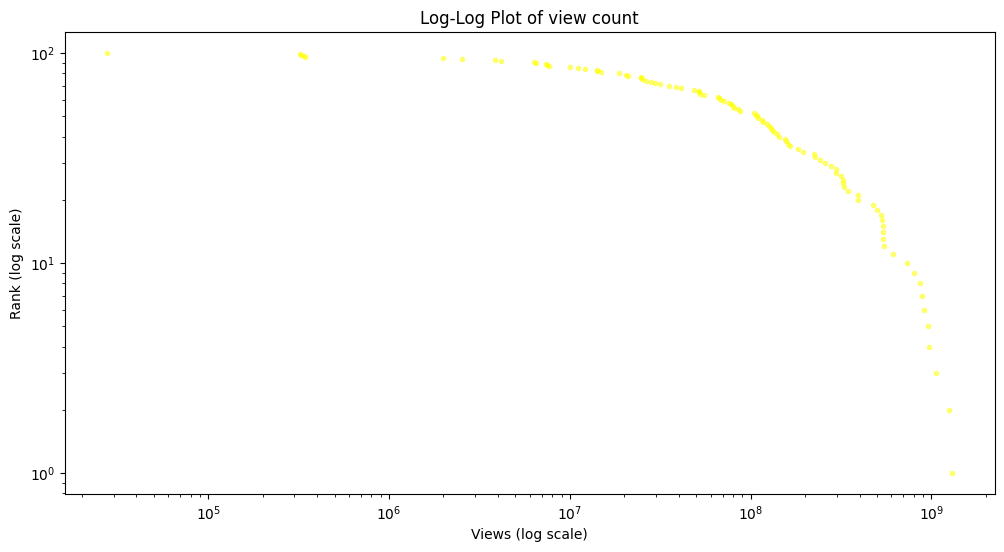

In [ ]:
# Plotting log-log plot
fig, ax = plt.subplots(figsize=(12, 6))

# Sort view counts in descending order
view_counts_sorted = sorted(view_counts, reverse=True)

# Generate ranks
ranks = range(1, len(view_counts_sorted) + 1)

ax.scatter(view_counts_sorted, ranks, alpha=0.5, marker='.', color='yellow')

ax.set_title('Log-Log Plot of view count')
ax.set_xlabel('Views (log scale)')
ax.set_ylabel('Rank (log scale)')
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

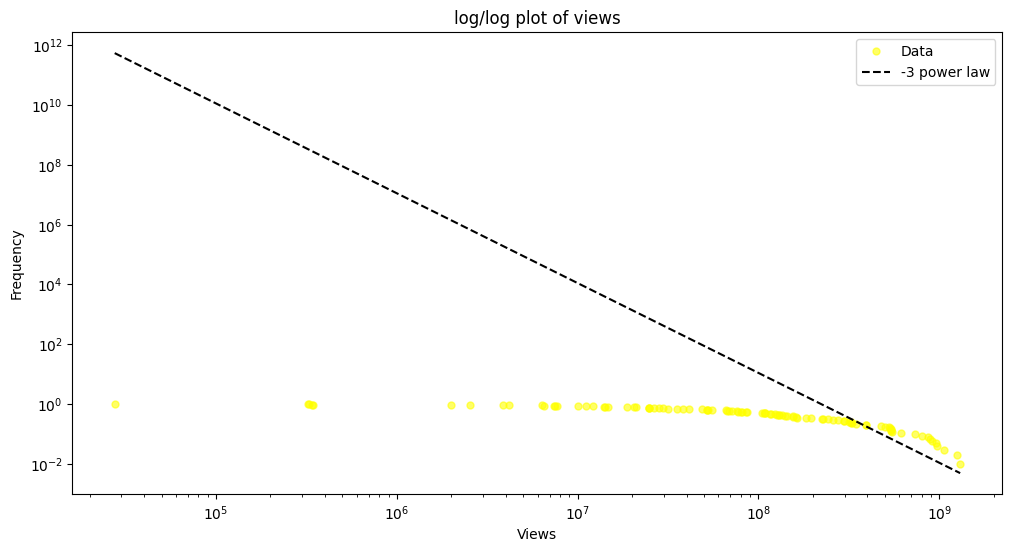

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

x_data = np.sort(view_counts)
y_data = np.arange(1, len(view_counts)+1) / len(view_counts)

# Scatter plot on log-log scale
ax.loglog(x_data, y_data[::-1], color = 'yellow', alpha=0.6, linestyle='', marker='o', markersize=5, label='Data')

# To add a power-law reference line with a slope of -3, we create a line in log-space
# that we know will have that slope when plotted on a log-log scale.
x_ref = np.array([min(view_counts), max(view_counts)])
y_ref = (x_ref / max(view_counts)) ** -3  # slope of -3 on a log-log scale

# Adjust the y_ref to lower the line
adjustment_factor = 0.005  # Lower this factor to lower the line further
y_ref = y_ref * adjustment_factor

# Plot the reference line
ax.loglog(x_ref, y_ref, 'k--', label='-3 power law')

# Label axes
ax.set_xlabel('Views')
ax.set_ylabel('Frequency')
ax.set_title('log/log plot of views')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
import powerlaw

# Fit the power-law model
results = powerlaw.Fit(view_counts)
R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)

print(f"Likelihood Ratio: {R}")
print(f"p-value: {p}")


Calculating best minimal value for power law fit
Likelihood Ratio: -1.3210445437812546
p-value: 0.18648651226738477


In [ ]:
import scipy.stats as stats

# Fit the power-law and exponential models
power_law_params = stats.powerlaw.fit(view_counts)
expon_params = stats.expon.fit(view_counts)

# Calculate the log-likelihoods
power_law_loglik = np.sum(stats.powerlaw.logpdf(view_counts, *power_law_params))
expon_loglik = np.sum(stats.expon.logpdf(view_counts, *expon_params))

# Calculate the number of parameters (k) - for both models this is 2
# We have scale and location parameters for both distributions.
k = 2

# Calculate the AICs
power_law_aic = 2 * k - 2 * power_law_loglik
expon_aic = 2 * k - 2 * expon_loglik

# Compare the AIC values
print(f"Power-law AIC: {power_law_aic}")
print(f"Exponential AIC: {expon_aic}")

Power-law AIC: 3982.3826133937473
Exponential AIC: 4054.3368851199466


In [ ]:
view_counts

array([ 528989350,  104261806,   14180555,  734490532,  144040173,
        130640523,   52692905,  298084743,    2000165,  108696851,
        130023739,  140297322,  391184269,   41314235,   31423929,
        297610508,  535511284,   71320649,  155911337,   48442995,
        155045429,   38443849,   55476229,  959645115,     343352,
        240978187,   14806512,  541699541, 1060425400,      27543,
        868578782,  134737174,    7467169,   66655953,  226795799,
        325436109,  328247757,  194187149,   76377791,  974871134,
          2526610,     340652, 1257094370,    7657315,  164336400,
          6370675,   18730379,  801226439,   81365783,  259100069,
          4150066, 1303854583,   14057892,   11153607,  548404084,
         35383124,  106952563,  183806961,   29770174,   86823062,
         24722535,   10086975,  123468677,  475605807,  615716659,
          6490653,     323928,   68716185,  540482247,  889080688,
         12097527,  326137451,  117169577,   24856402,     326

<ipython-input-115-8b755add96c3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['viewCount'] = pd.to_numeric(filtered_df['viewCount'], errors='coerce')


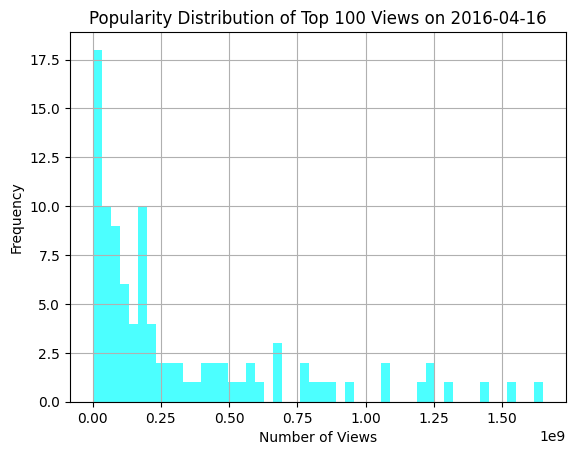

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select date
your_date = '2016-04-16'

# Filter the dataset for records on the specific day
filtered_df = final_yt_df[final_yt_df['Day'] == your_date]

# Convert the 'viewCount' column to numeric
filtered_df['viewCount'] = pd.to_numeric(filtered_df['viewCount'], errors='coerce')

# Drop rows with NaN values in 'viewCount' (if any)
filtered_df = filtered_df.dropna(subset=['viewCount'])

# Extract the view counts for that day
view_counts = filtered_df['viewCount']

# Plot the distribution of the number of views within the x-axis range
plt.hist(view_counts, bins=50, color='cyan', alpha=0.7)
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.title('Popularity Distribution of Top 100 Views on ' + your_date)
plt.grid(True)


plt.show()

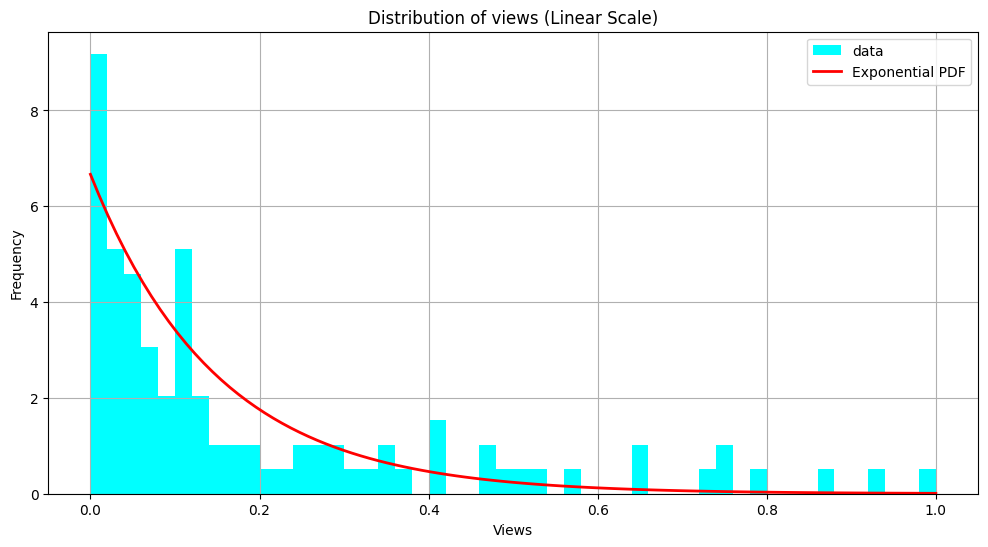

In [ ]:
import plotly.express as px
import numpy as np
from scipy.stats import expon

# Convert view_counts to a NumPy array
view_counts = np.array(view_counts)

# Normalize view counts
norm_view_counts = (view_counts - np.min(view_counts)) / (np.max(view_counts) - np.min(view_counts))

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting in linear scale
ax.hist(norm_view_counts, bins=50, color='cyan', label='data', density=True)

x = np.linspace(np.min(norm_view_counts), np.max(norm_view_counts), len(norm_view_counts))
exp_pdf = expon.pdf(x, scale=.15)

# Adding exponential distribution line to the histogram
ax.plot(x, exp_pdf, 'red', lw=2, label='Exponential PDF')

# Add a legend and show the plot
ax.grid(True)
ax.legend()

# Set titles and labels
ax.set_title('Distribution of views (Linear Scale)')
ax.set_xlabel('Views')
ax.set_ylabel('Frequency')
ax.grid(True)
ax.legend()

plt.show()


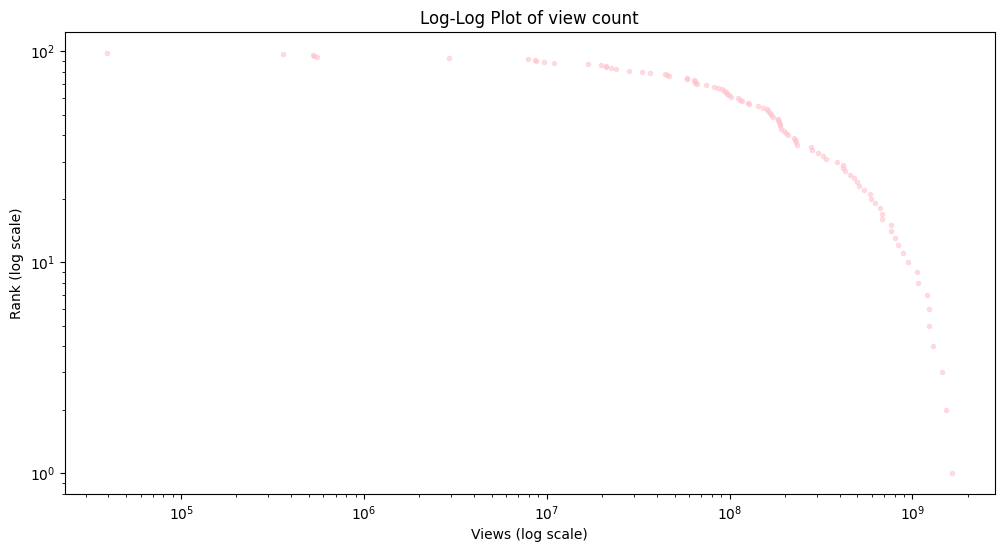

In [ ]:
# Plotting log-log plot
fig, ax = plt.subplots(figsize=(12, 6))

# Sort view counts in descending order
view_counts_sorted = sorted(view_counts, reverse=True)

# Generate ranks
ranks = range(1, len(view_counts_sorted) + 1)

ax.scatter(view_counts_sorted, ranks, alpha=0.5, marker='.', color='pink')

ax.set_title('Log-Log Plot of view count')
ax.set_xlabel('Views (log scale)')
ax.set_ylabel('Rank (log scale)')
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

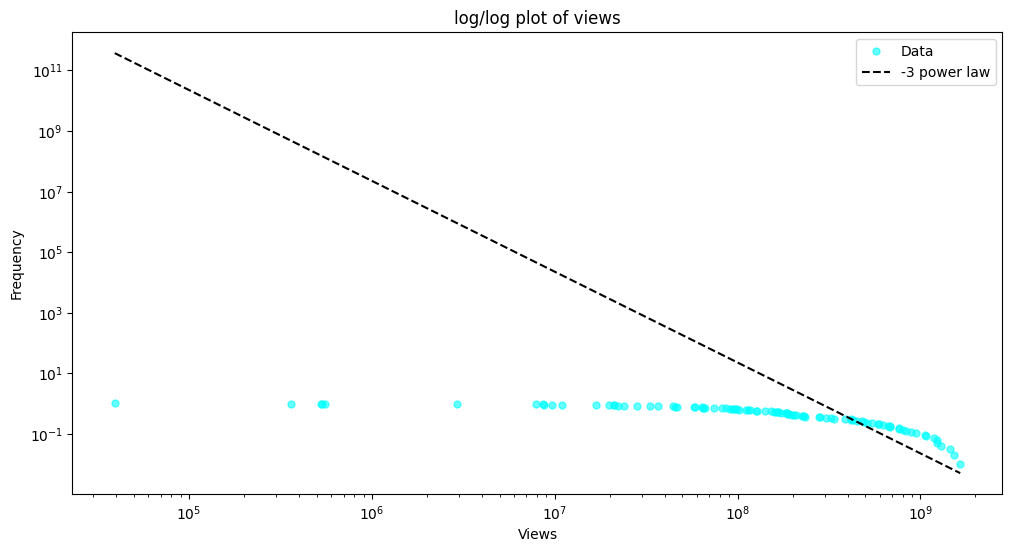

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

x_data = np.sort(view_counts)
y_data = np.arange(1, len(view_counts)+1) / len(view_counts)

# Scatter plot on log-log scale
ax.loglog(x_data, y_data[::-1], color = 'cyan', alpha=0.6, linestyle='', marker='o', markersize=5, label='Data')

# To add a power-law reference line with a slope of -3, we create a line in log-space
# that we know will have that slope when plotted on a log-log scale.
x_ref = np.array([min(view_counts), max(view_counts)])
y_ref = (x_ref / max(view_counts)) ** -3  # slope of -3 on a log-log scale

# Adjust the y_ref to lower the line
adjustment_factor = 0.005  # Lower this factor to lower the line further
y_ref = y_ref * adjustment_factor

# Plot the reference line
ax.loglog(x_ref, y_ref, 'k--', label='-3 power law')

# Label axes
ax.set_xlabel('Views')
ax.set_ylabel('Frequency')
ax.set_title('log/log plot of views')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
import powerlaw

# Fit the power-law model
results = powerlaw.Fit(view_counts)
R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)

print(f"Likelihood Ratio: {R}")
print(f"p-value: {p}")


Calculating best minimal value for power law fit
Likelihood Ratio: -1.842703495031209
p-value: 0.065372313459435


In [ ]:
import scipy.stats as stats

# Fit the power-law and exponential models
power_law_params = stats.powerlaw.fit(view_counts)
expon_params = stats.expon.fit(view_counts)

# Calculate the log-likelihoods
power_law_loglik = np.sum(stats.powerlaw.logpdf(view_counts, *power_law_params))
expon_loglik = np.sum(stats.expon.logpdf(view_counts, *expon_params))

# Calculate the number of parameters (k) - for both models this is 2
# We have scale and location parameters for both distributions.
k = 2

# Calculate the AICs
power_law_aic = 2 * k - 2 * power_law_loglik
expon_aic = 2 * k - 2 * expon_loglik

# Compare the AIC values
print(f"Power-law AIC: {power_law_aic}")
print(f"Exponential AIC: {expon_aic}")

Power-law AIC: 3985.344077804887
Exponential AIC: 4043.3790064752784


<ipython-input-121-a1c42268386c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['viewCount'] = pd.to_numeric(filtered_df['viewCount'], errors='coerce')


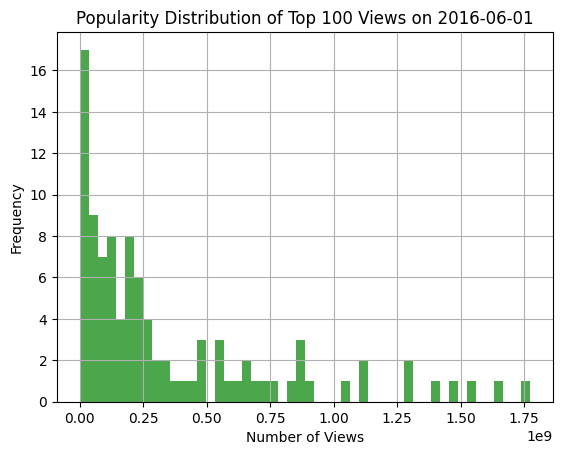

In [ ]:
# Select date
your_date = '2016-06-01'

# Filter the dataset for records on the specific day
filtered_df = final_yt_df[final_yt_df['Day'] == your_date]

# Convert the 'viewCount' column to numeric
filtered_df['viewCount'] = pd.to_numeric(filtered_df['viewCount'], errors='coerce')

# Drop rows with NaN values in 'viewCount' (if any)
filtered_df = filtered_df.dropna(subset=['viewCount'])

# Extract the view counts for that day
view_counts = filtered_df['viewCount']

# Plot the distribution of the number of views within the x-axis range
plt.hist(view_counts, bins=50, color='green', alpha=0.7)
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.title('Popularity Distribution of Top 100 Views on ' + your_date)
plt.grid(True)


plt.show()

In [ ]:
# Fit the power-law model
results = powerlaw.Fit(view_counts)
R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)

print(f"Likelihood Ratio: {R}")
print(f"p-value: {p}")

Calculating best minimal value for power law fit
Likelihood Ratio: -1.728296024577885
p-value: 0.08393516543809011


In [ ]:
# Fit the power-law and exponential models
power_law_params = stats.powerlaw.fit(view_counts)
expon_params = stats.expon.fit(view_counts)

# Calculate the log-likelihoods
power_law_loglik = np.sum(stats.powerlaw.logpdf(view_counts, *power_law_params))
expon_loglik = np.sum(stats.expon.logpdf(view_counts, *expon_params))

# Calculate the number of parameters (k) - for both models this is 2
# We have scale and location parameters for both distributions.
k = 2

# Calculate the AICs
power_law_aic = 2 * k - 2 * power_law_loglik
expon_aic = 2 * k - 2 * expon_loglik

# Compare the AIC values
print(f"Power-law AIC: {power_law_aic}")
print(f"Exponential AIC: {expon_aic}")

Power-law AIC: 4004.652418872024
Exponential AIC: 4061.218585573972


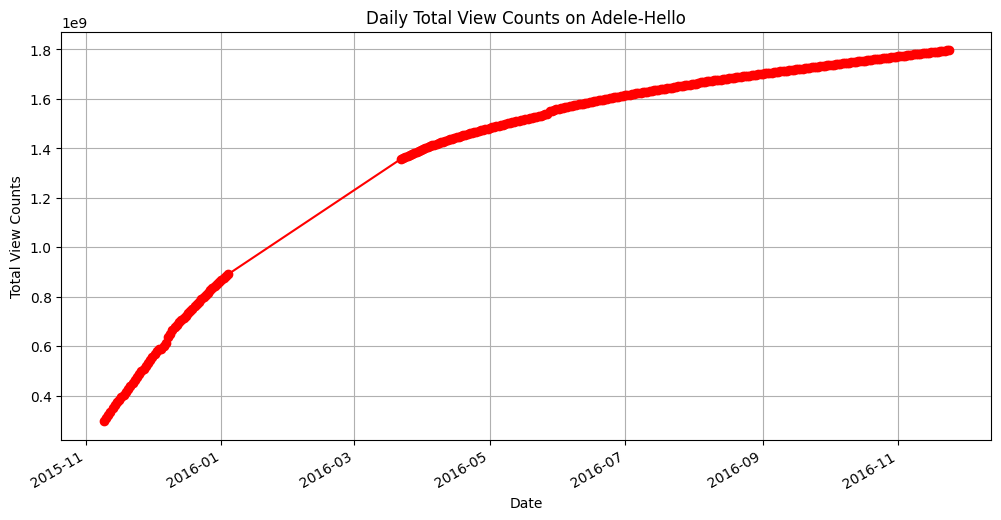

In [ ]:
## GRAPHING INDIVIDUAL SONGS

adele_hello = final_yt_df[final_yt_df['songTitle'] == 'Adele - Hello']

# Group by day and sum the view counts
daily_views = adele_hello.groupby('Day')['viewCount'].sum()

# Plotting
plt.figure(figsize=(12, 6))
daily_views.plot(kind='line', color='red', marker='o')
plt.title('Daily Total View Counts on Adele-Hello')
plt.xlabel('Date')
plt.ylabel('Total View Counts')
plt.grid(True)
plt.show()

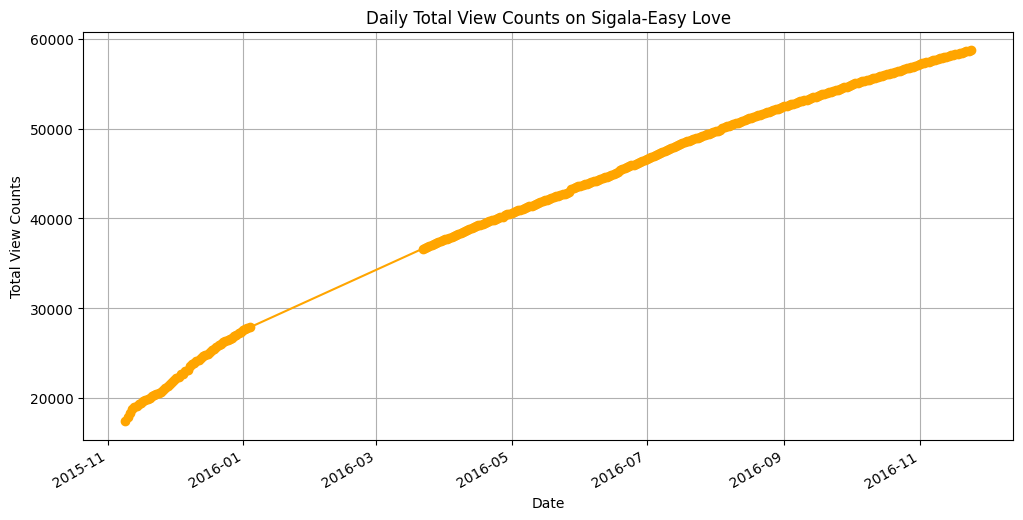

In [ ]:

sigala = final_yt_df[final_yt_df['songTitle'] == 'Sigala - Easy Love (Original Mix)']

# Group by day and sum the view counts
daily_views = sigala.groupby('Day')['viewCount'].sum()

# Plotting
plt.figure(figsize=(12, 6))
daily_views.plot(kind='line', color='orange', marker='o')
plt.title('Daily Total View Counts on Sigala-Easy Love')
plt.xlabel('Date')
plt.ylabel('Total View Counts')
plt.grid(True)
plt.show()

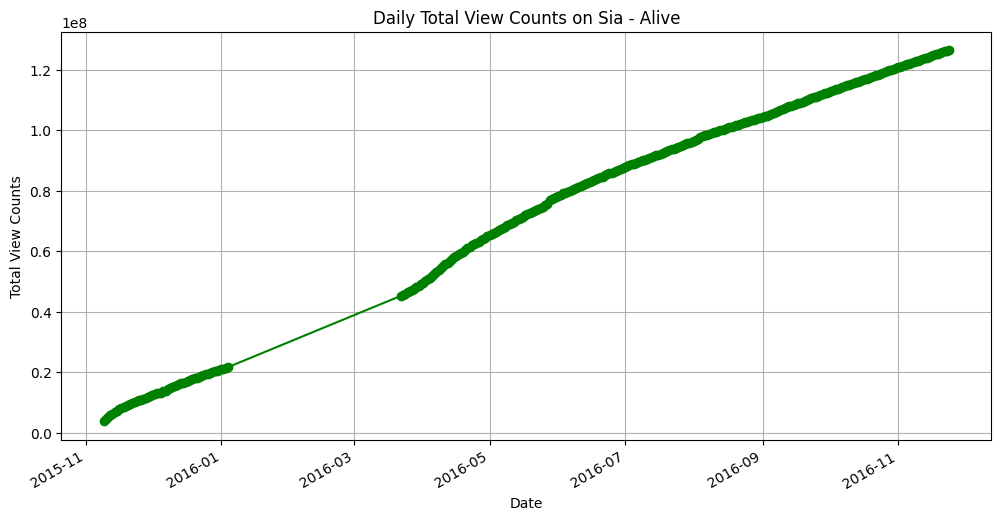

In [ ]:
song = final_yt_df[final_yt_df['songTitle'] == 'Sia - Alive']

# Group by day and sum the view counts
daily_views = song.groupby('Day')['viewCount'].sum()

# Plotting
plt.figure(figsize=(12, 6))
daily_views.plot(kind='line', color='green', marker='o')
plt.title('Daily Total View Counts on Sia - Alive')
plt.xlabel('Date')
plt.ylabel('Total View Counts')
plt.grid(True)
plt.show()